# import必須

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas as pd
import os

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_moons

# 疑似データ
機械学習をわかりやすく解説するためのデータ  
今回はforgeデータを使用する

### 分類


X.shape: (26, 2)


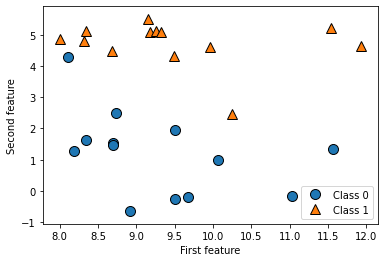

In [15]:
#データを可視化
X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:", X.shape)

### k-NNの可視化

C:\Users\S2\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


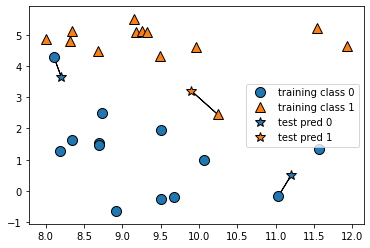

In [16]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\S2\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


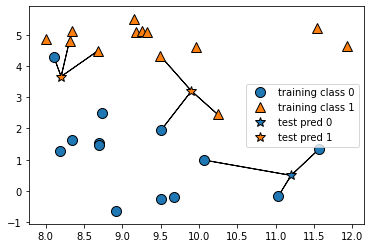

In [17]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

### 実際のk-NN

In [24]:
# テストデータの分割
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [27]:
# k-NNのインスタンス化
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [28]:
# 学習
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
# テスト（予測）
print(clf.predict(X_test))
print(clf.score(X_test, y_test))

[1 0 1 0 1 0 0]
0.8571428571428571


C:\Users\S2\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\S2\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

### kを変化させたときの図

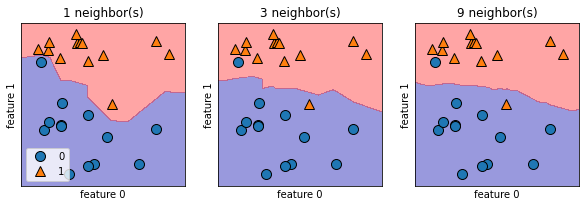

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

### 回帰

Text(0, 0.5, 'Target')

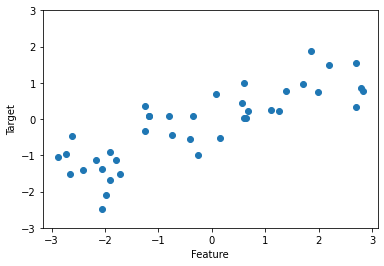

In [41]:
# 可視化

X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

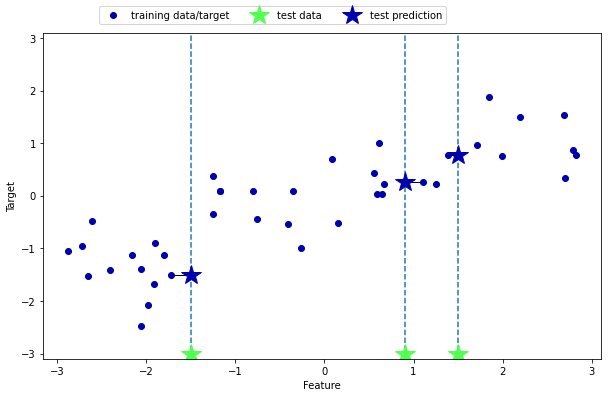

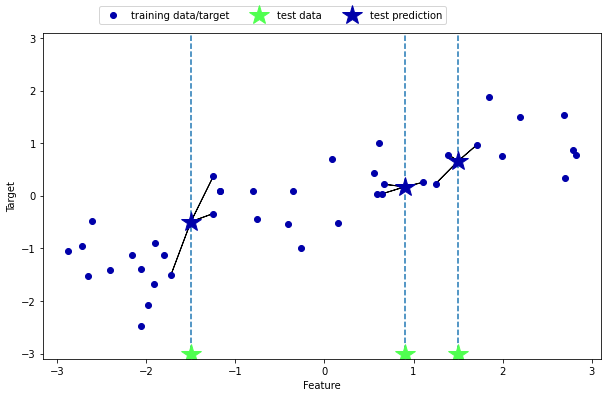

In [38]:
# 最近傍回帰のイメージ

mglearn.plots.plot_knn_regression(n_neighbors=1)
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [39]:
from sklearn.neighbors import KNeighborsRegressor

In [43]:
X, y = mglearn.datasets.make_wave(n_samples = 40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [47]:
reg = KNeighborsRegressor(n_neighbors = 3)
reg.fit(X_train, y_train)
print(reg.predict(X_test))
print(reg.score(X_test, y_test))

[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
0.8344172446249605


### 回帰予測器
#### R<sup>2</sup>(Rスクエア)
今回のスコアの算出に使われている．  
1に近いほど予測精度が高く，0に近いほど予測精度が低い．  
モデルのスコアを表現したいときに使う．  

#### RMSE
予測値と実際の値の差の2乗の平均がMSE  
そのMSEのルートをとったものがRMSE  
データと同じ単位になる．  
予測誤差の大きさを数値化かつ単位をそろえたいときに使う．  

#### MAE
予測値と実際の値の差の絶対値の平均．  
外れ値の影響をうけにくい指標  
誤差の大きさを把握したい場合に有用  
差ではなくパーセントで表すとMAPE  


In [60]:
# Rスクエアの算出
trues = [1, 2, 3, 4, 5]
# preds = [1.1, 1.9, 3.2, 3.8, 5]
preds = [1.1, 1.9, 3.2, 3.8, 3]

ave_true = sum(trues)/len(trues)
SST = sum([(true - ave_true) ** 2 for true in trues]) # SST（全平方和）= 平均値からの差の2乗の合計
SSE = sum([(true - pred) ** 2 for true, pred in zip(trues, preds)])

print(SST, SSE)

R_square = 1 - SSE/SST
print(R_square)

10.0 4.1000000000000005
0.59


In [61]:
### kを変化させたときの図

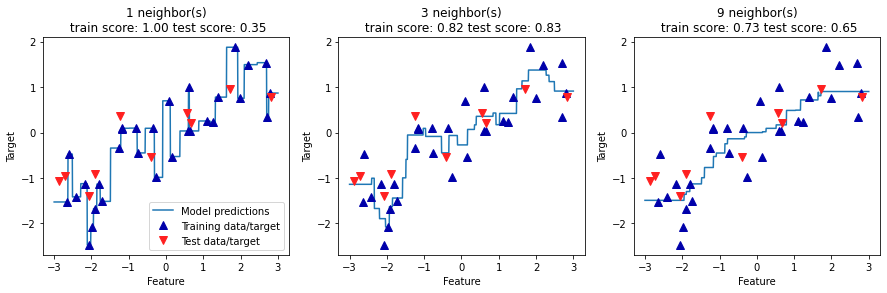

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

# k-NNのデメリット
- 訓練セットが大きいと予測は遅くなる
- 特徴量が0となるようなデータセットでは性能が悪い  
そのため，実際にはほとんど使われていない

# 線形モデル
- 特徴量の線形関数を用いて予測を行う．
- 多数の特徴量をもつデータに対しては強力
- 線形回帰やリッジ回帰，ロジスティック回帰やSVM・SVCがある

## 線形回帰
訓練データにおいて，予測値と正解値の平均2乗誤差が最小になるようにパラメータwとbを求める方法．  
平均2乗誤差は予測値と正解値の差を2乗した平均値である．  

### 特徴量が1つのモデル
このような1次元データセットは過学習の危険は少ない．

In [13]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_(重みor係数):", lr.coef_)
print("lr.intercept_(オフセットor切片):", lr.intercept_)

lr.coef_(重みor係数): [0.39390555]
lr.intercept_(オフセットor切片): -0.031804343026759746


In [14]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


### 特徴量が複数のモデル
boston housingデータセットは104の特徴量をもつ506のサンプル  
より複雑なデータセットは過剰適合する．

In [15]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [16]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


## リッジ回帰
複雑度が高いデータセットにも対応できる回帰モデル  
予測に用いられる式は通常最小二乗法と同様  
ただし，リッジ回帰での係数は，予測結果への適合だけで決めず他の制約もかねる．  

リッジ回帰は，係数の絶対値の大きさを可能な限り小さくする．  
そうすることで，個々の特徴量が出力に与える影響をなるべく小さくする．  

このような制約条件は正則化の一例である．  
リッジ回帰で用いられる正則化は，L2正則化と呼ばれる．

#### 正規化
**L1正規化**  
L1正規化はLasso正規化ともよばれる
L1正規化は，損失関数に重みの絶対値の和に比例する項を加えることで，一部の重みパラメタをゼロにする．  
これによって，モデルが単純化され重要ではない特徴量の影響が排除される．  
**L2正規化**  
L2正規化はRidge正規化ともよばれる．  
重みの2乗の和に比例する項を加えることで，重みの大きさを制限する．  
L2正規化では重みが完全にゼロになることは少なく，多くの重みが小さい値に近づく．  
これは重みの大きさが勾配降下法の導関数に影響を与えるため．  

他にはL1正規化とL2正規化を合わせたElastic Net正規化やDropoutがある．

In [17]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [18]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


## Lasso
LaasoはL1正規化を使用したモデル  
重みが0になりやすく，0になった特徴量は完全に無視されることになる．  
重みの更新は非線形であり，更新は重み，データポイント，alpha値に依存する．  

In [19]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [20]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


## リッジとLassoどちらをつかうか
まずはリッジ回帰を試してみる．  
特徴量がたくさんあって，そのうち重要なものはわずかしかないことが予測される場合はLassoのほうが向いている．  
解釈しやすいモデルがほしいなら特徴量を選択してくれるLassoのほうが理解しやすいモデルが得られる．  
実用上は，LassとRidgeのペナルティを組み合わせたElasticNetが最良の結果をもたらす．  
ただし，L1とL2のパラメタを2つ調整する必要がある．

# 線形モデルによるクラス分類
正規化のクラス分類では，決定境界が入力の線形関数となる．  
つまり，線形の2クラス分類器は2つのクラスを直線，平面，超平面で分割するということ．  

よく使われるモデルは
- ロジスティック回帰
- SVM(サポートベクタマシン)

上記2つはデフォルトでL2正規化を行う．  

### Cについて
正規化の強度を決定するトレードオフパラメタはCと呼ばれ，Cが大きくなると正規化は弱くなる．  
つまりCが大きいと訓練データに対する適合度を上げ，Cを小さくすると係数を0に近づける．  
また，小さいCを用いるとデータポイントの大多数に対して適合しようとするが，大きいCは個々のデータポイントを正確にクラス分類することを重視する．

C:\Users\S2\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


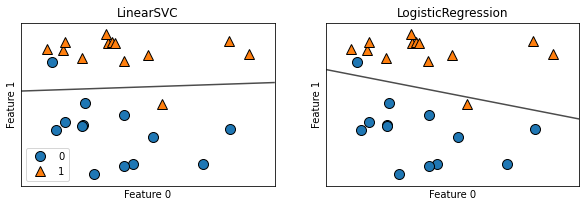

In [21]:
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

In [8]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.951


C:\Users\S2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 線形モデルによる多クラス分類
多くの線形クラス分類モデルは2クラス分類にしか適用できない（ロジスティック回帰は例外）．  
なので，1対他 を複数回行い，最も高いスコアだったクラスを推定結果とする．  

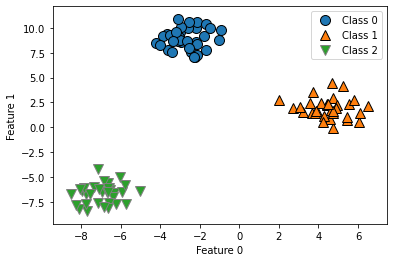

In [8]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [9]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


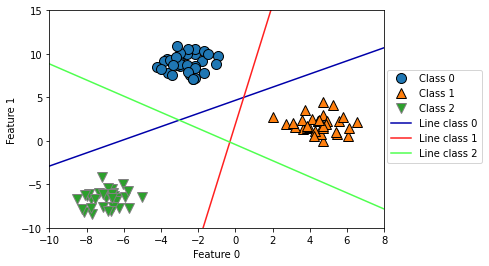

In [10]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

# ナイーブベイズクラス分類
線形モデルによく似たクラス分類  
訓練が線形モデルよりもさらに高速  
汎化性能は線形モデルよりわずかに劣る場合が多い

scikit-learnには，3種類のナイーブベイズクラス分類器が実装されている．
 - GaussianNB
 - BernoulliNB
 - MultinomialNB


In [4]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [5]:
counts = {}
for label in np.unique(y):    
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n", counts)

Feature counts:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [6]:
 print(np.unique(y))

[0 1]


### 利点・欠点・パラメタ
MultinormialNBとBernoulliNBのパラメタは，モデルの複雑さを制御するalphaひとつだけ．  
alphaが大きくなるとモデルの複雑さは減少する．  
しかし，アルゴリズムの性能に大きく影響することはない．  

GaussianNBは高次元データに対して用いられる．他は疎なカウントデータに対して用いられる．  

ナイーブベイズモデルの利点と欠点の多くは線形モデルと同じ．  
訓練も予測も非常に高速で，訓練の過程も理解しやすい．  

# 決定木
決定木はクラス分類と回帰タスクに広く用いられる．  
決定木では，Yes/Noで答えられる質問で構成された階層的な木構造を学習する．  
木構造の深さは，ある対象の領域（決定木の葉）に1つの対象値（1クラスもしくは1つの回帰値）しか含まれなくなるまで繰り返される．  
ただし，これでは過学習が起きてしまう．訓練データに100%の精度を出すが，汎化性能は低い．  
なので，2つの方法で過学習を防ぐ．
- 事前枝刈り
- 事後枝刈り
scikit-learnには事前枝刈りしか実装されていない．

決定木の回帰は訓練データのレンジの外側に対して予測ができない．

In [8]:
mglearn.plots.plot_animal_tree()

ModuleNotFoundError: No module named 'graphviz'

In [12]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [13]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [15]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


<ipython-input-24-e915654c9c38>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]
<ipython-input-24-e915654c9c38>:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


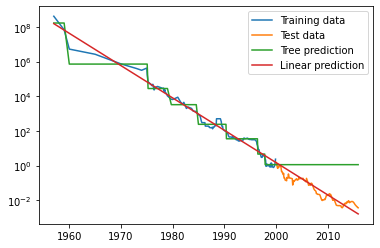

In [24]:


ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

### 決定木の長所・短所・パラメタ
パラメタは事前枝刈りパラメタ．  
過剰学習を防ぐには，max_depth，max_leaf_nodes，min_samples_leafのどれか1つ選ぶ．  

利点
- 結果のモデルが用意に可視化可能，理解可能
- データのスケールに対して完全に不変  

つまり，特徴量の正規化や標準化は必要がない．  
また2値特徴量と連続値特徴量が混ざっていても問題なく機能する．

問題点は過学習しやすいところ

# ランダムフォレスト
決定木の過学習しやすいという欠点を克服するためのモデル  
ランダムフォレストは，少しずつ異なるたくさんの決定木を作成し，それらの決定木の平均をとることで過学習を防ぐ．
これらの決定木は異なる木になるように，ランダムに制作する必要がある．  
決定木を作るステップは以下．
1. データからブートストラップサンプリングを行う
2. 特徴量のサブセットをランダムに選択する．

つまり，異なるデータセットと異なる特徴量を用いて決定木を構築する．  
n_estimatorsパラメタは決定木の数  


In [3]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [5]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


### Random Forestの長所・短所・パラメタ
ランダムフォレストは現在最も広く使われている機械学習手法．  
ランダムフォレストは，テキストデータなどの非常に高次元で疎なデータに対してはうまく機能しない．  
その場合は線形モデルのほうが適している．　　

調整すべきパラメタはn_estimators, max_features, max_depth  
n_estimatorsは大きければ大きいほうがいい．  
しかし，増やすことのメリットは増やせば増やすほど小さくなり，メモリも時間も必要になる．  
max_featuresはデフォルト値を使うのがいい．  

# 勾配ブースティング回帰木
複数の決定木を組み合わせるモデル．  
回帰もクラス分類もできる．　　
勾配ブースティングでは，1つ前の決定木の誤りを次の決定木が修正するようにして，決定木を順番に作っていく．  
勾配ブースティングはデフォルトではランダム性はないが，強力な事前枝刈りが行われる．　　


1つの決定木は浅い決定木で，その決定木を多数組み合わせる．  
勾配ブースティングは，パラメタ選定の影響を受けやすいが，パラメタさえ正しく設定されていれば，ランダムフォレストより性能がいい．  


パラメタは
- 事前枝刈り
- 決定木の数
- 学習率
がある．

学習率を大きくすると，個々の決定木が強く補正を行おうとするため，モデルは複雑になる．  
決定木の数を増やすともちろんモデルは複雑になる．  
デフォルトでは，深さ3・決定木100・学習率0.1

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [9]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [10]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.958


### 勾配ブースティング回帰木の長所・短所・パラメタ
教師あり学習の中で最も強力で，広く使われている．  
短所は，パラメタのチューニングに注意が必要・訓練にかかる時間が長い  
長所は特徴量のスケール変換をする必要がない・2値特徴量と連続特徴量が混在していてもうまく機能する．  
ただ高次元の疎なデータに対してはうまく機能しない．　　

ランダムフォレストはn_estimatorsは大きければ大きいほどいい．  
しかし，勾配ブースティング回帰木はn_estimatorsを大きくすると過学習をまねく．  
よく用いられるパラメタ調整方法は，n_estimatorsを時間とメモリ量で決めておいて，learning_rateを調整する方法．  
max_depthは小さく設定され深さ5以上になることはあまりない．

# カーネル法を用いたSVM
線形サポートベクタマシンとは異なるモデル．  
入力空間の超平面のような簡単なモデルではなく，複雑なモデルを可能にするためのモデル．  
scikit learnではSVCがクラス分類，SVRが回帰．

カーネル法を用いたサポートベクタマシンの背後にある数学はかなり難しい...

線形モデルは直線や超平面が柔軟性を制限する．  
特徴量を追加することで，柔軟性を向上する．  
たとえば，交互作用や多項式項を加えることで特徴量が追加される．　　


実際にどの特徴量を加えたらいいかわからないため，クラス分類器を学習させる巧妙な数学的トリックを使う．  
これがカーネルトリックと呼ばれるもの．  
カーネルトリックには
- 多項式カーネル
- 放射基底関数（RBF）カーネル
がある．

### RBFを用いたSVM

Text(0, 0.5, 'Feature 1')

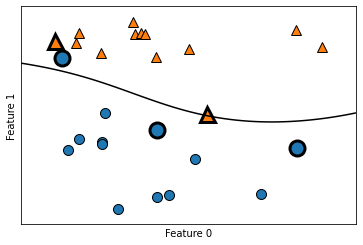

In [3]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

sv = svm.support_vectors_

sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### パラメタ
- gammaパラメタはガウシアンカーネルの幅を調整
- Cパラメタは正則化パラメタ

gammaが大きくなるとモデルは複雑になる．  
Cを大きくすると境界がなめらかになる．  

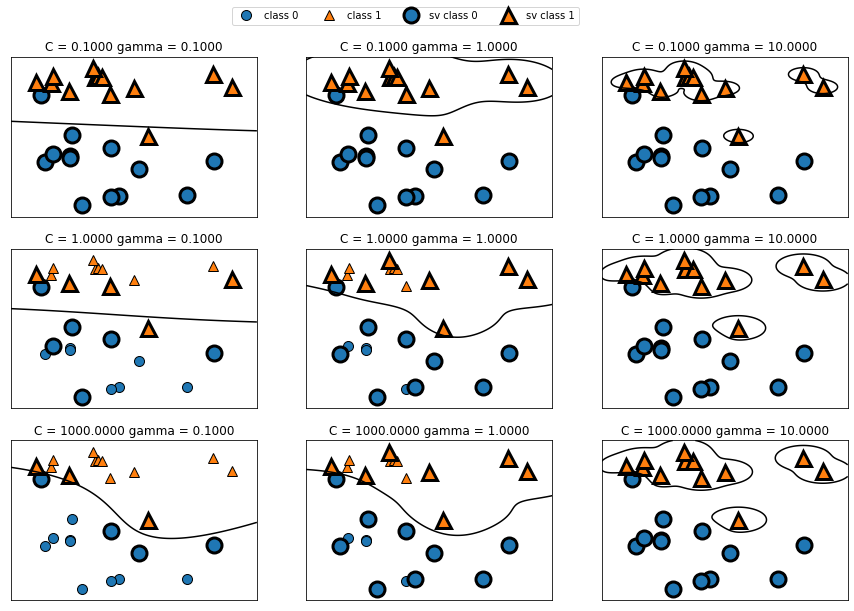

In [4]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

### データの前処理

SVMはパラメタの設定とデータのスケールによって，過学習などがおこりやすい．  
よってすべての特徴量をだいたい同じスケールにするようにスケール変換したほうがよい．  

In [10]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)

X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n", X_train_scaled.min(axis=0))
print("Maximum for each feature\n", X_train_scaled.max(axis=0))

X_test_scaled = (X_test - min_on_training) / range_on_training

Minimum for each feature
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [11]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
        svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.972


### SVMの利点・欠点・パラメタ
カーネル法を用いたサポートベクタマシンはさまざまなデータセットに対してうまく機能するモデル  
利点はデータにわずかな特徴量しかない場合にも複雑な決定境界を生成することができる．  

問題点は，注意深くデータの前処理とパラメタ調整を行う必要がある点．よって今は前処理がほぼ不要な決定木ベースのモデルが用いられている．  

しかし，特徴量が似た測定器の測定結果のように同じスケールになる場合には，SVMを試してみる価値がある．重要なパラメタは正則化パラメタCとカーネルの選択とカーネル固有のパラメタである．

# ニューラルネットワーク
とばす．
詳細はゼロから作るDeep Learinng  
https://github.com/Kai-Washino/zero-deeplearning-1

# クラス分類器の不確実性推定
scikit-learnには，クラス分類器の不確実性推定に利用できる関数は2つある．  
- decision_function
- predict_proba

#### 2クラス分類

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

y_named1 = np.array(["blue", "red"])[y]

X_train1, X_test1, y_train_named1, y_test_named1, y_train1, y_test1 = \
    train_test_split(X, y_named, y, random_state=0)

gbrt1 = GradientBoostingClassifier(random_state=0)
gbrt1.fit(X_train1, y_train_named1)

GradientBoostingClassifier(random_state=0)

#### 多クラス分類

In [41]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt2 = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt2.fit(X_train2, y_train2)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

### Desision Function
正であれば陽性，負であれば陰性を意味する．  
数の絶対値はその信頼度となる．

ただ，どのようなスケールで表示されるかわからないので解釈が難しい

In [42]:
# 2クラス分類
print("Decision function:", gbrt1.decision_function(X_test1)[:6])

Decision function: [ 4.13592603 -1.67785652 -3.95106099 -3.62604651  4.28986642  3.66166081]


In [43]:
# 多クラス分類
print("Decision function:")
print(gbrt2.decision_function(X_test2)[:6, :])

Decision function:
[[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]


### Predict Proba
第1エントリは第1クラスの予測確率，第2エントリは第2クラスの予測確立である．  
出力は常に0から1で，和は1となる．  

In [45]:
# 2クラス分類
print("Predicted probabilities:")
print(gbrt1.predict_proba(X_test1[:6]))

Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84262049 0.15737951]
 [0.98112869 0.01887131]
 [0.97406909 0.02593091]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


In [21]:
# 多クラス分類
print("Predicted probabilities:")
print(gbrt.predict_proba(X_test)[:6])
# show that sums across rows are one
print("Sums:", gbrt2.predict_proba(X_test2)[:6].sum(axis=1))

Predicted probabilities:
[[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
Sums: [1. 1. 1. 1. 1. 1.]
